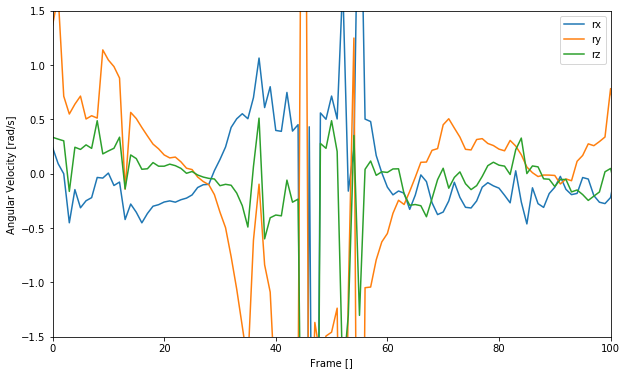

In [2]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

with open('../build/latest_estimated_angular_velocity.csv', 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # ヘッダー行を読み飛ばし

    data = []
    for row in reader:
        data.append(row)

legends = [i for i in header]
data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
# data = [print(row) for row in data]  # 文字列を数値に変換
# X軸に時間を、Y軸にデータをセット
t = [row[legends.index('Frame')] for row in data]
rx = [row[legends.index('rx')] for row in data]
ry = [row[legends.index('ry')] for row in data]
rz = [row[legends.index('rz')] for row in data]

plt.figure(figsize=(10,6))

plt.plot(t, rx, label='rx')
plt.plot(t, ry, label='ry')
plt.plot(t, rz, label='rz')
plt.legend()

#ラベルを追加
plt.xlabel('Frame []')
plt.ylabel('Angular Velocity [rad/s]')
plt.ylim(-1.5,1.5)
plt.xlim(0,100)
plt.show()

In [3]:
# CSVファイルから時系列データを読み込み、Matplotlibでグラフにデータを表示する。

from cProfile import label
import csv
import matplotlib.pyplot as plt

def openCSV(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        header = next(reader)  # ヘッダー行を読み飛ばし

        data = []
        for row in reader:
            data.append(row)

    legends = [i for i in header]
    data = [[float(i) for i in row] for row in data]  # 文字列を数値に変換
    # data = [print(row) for row in data]  # 文字列を数値に変換
    # X軸に時間を、Y軸にデータをセット
    t = [row[legends.index('Frame')] for row in data]
    rxw = [row[legends.index('rx')] for row in data]
    ryw = [row[legends.index('ry')] for row in data]
    rzw = [row[legends.index('rz')] for row in data]
    return t, rxw, ryw, rzw

def plotAngularVelocityCSV(t,rx,ry,rz,xlim=None,ylim=None):


    plt.figure(figsize=(10,6))

    plt.plot(t, rx, 'r',label='rx')
    plt.plot(t, ry, 'g', label='ry')
    plt.plot(t, rz, 'b' ,label='rz')
    # plt.plot(t, rxw, 'r--',label='rxw')
    # plt.plot(t, ryw, 'g--',label='ryw')
    # plt.plot(t, rzw, 'b--',label='rzw')
    plt.legend()

    #ラベルを追加
    plt.xlabel('Frame []')
    plt.ylabel('Angular Velocity [rad/s]')
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    plt.grid()
    plt.show()

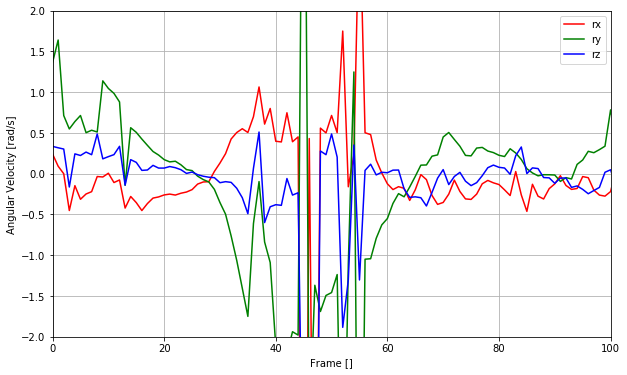

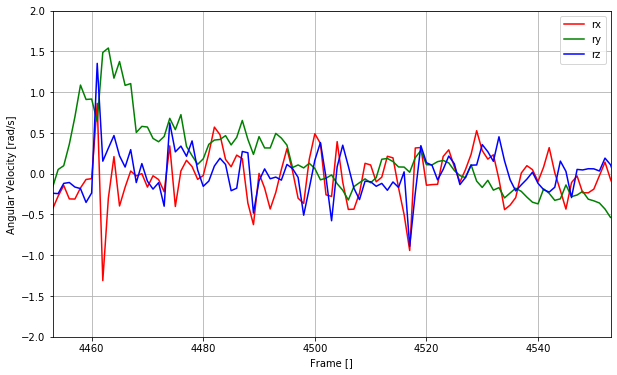

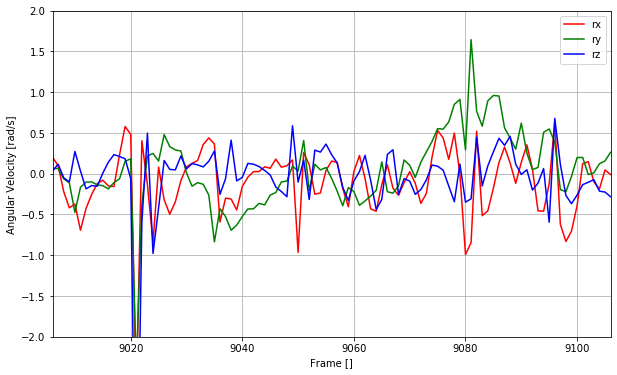

In [4]:
tc, rxc, ryc, rzc = openCSV('../build/latest_estimated_angular_velocity.csv')
plotAngularVelocityCSV(tc,rxc,ryc,rzc,xlim=[0,100],ylim=[-2,2])
plotAngularVelocityCSV(tc,rxc,ryc,rzc,xlim=[max(t)/2-100,max(t)/2],ylim=[-2,2])
plotAngularVelocityCSV(tc,rxc,ryc,rzc,xlim=[max(t)-100,max(t)],ylim=[-2,2])

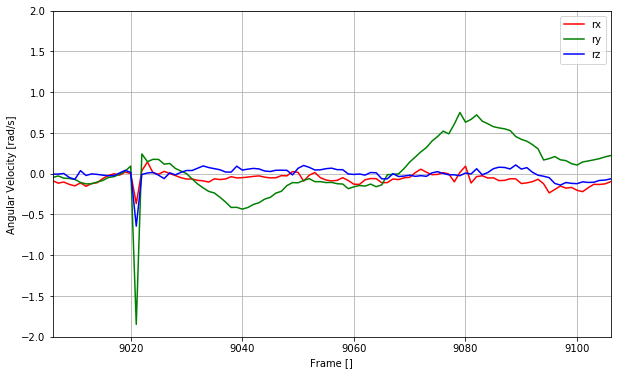

In [5]:
tc, rxwc, rywc, rzwc = openCSV('../build/latest_warped_estimated_angular_velocity.csv')
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[max(t)-100,max(t)],ylim=[-2,2])

In [6]:
def plotDualAngularVelocityCSV(t,rx,ry,rz,rxw,ryw,rzw,xlim=None,ylim=None):


    plt.figure(figsize=(10,6))

    plt.plot(t, rx, 'r',label='rx')
    plt.plot(t, ry, 'g', label='ry')
    plt.plot(t, rz, 'b' ,label='rz')
    plt.plot(t, rxw, 'r--',label='rxw')
    plt.plot(t, ryw, 'g--',label='ryw')
    plt.plot(t, rzw, 'b--',label='rzw')
    plt.legend()

    #ラベルを追加
    plt.xlabel('Frame []')
    plt.ylabel('Angular Velocity [rad/s]')
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    plt.grid()
    plt.show()

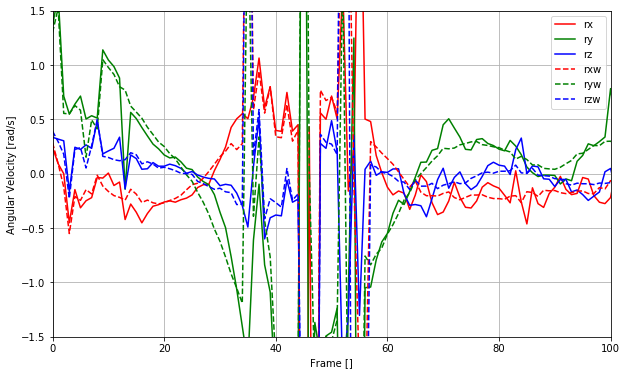

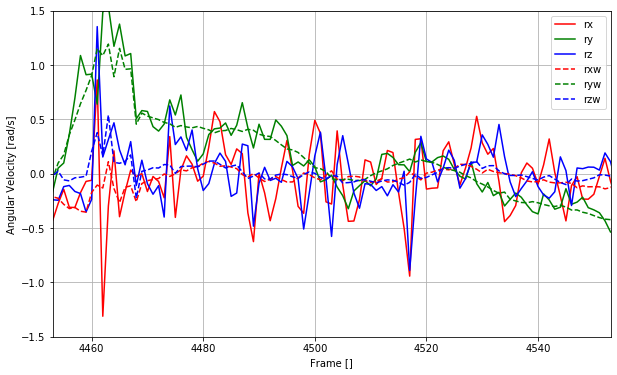

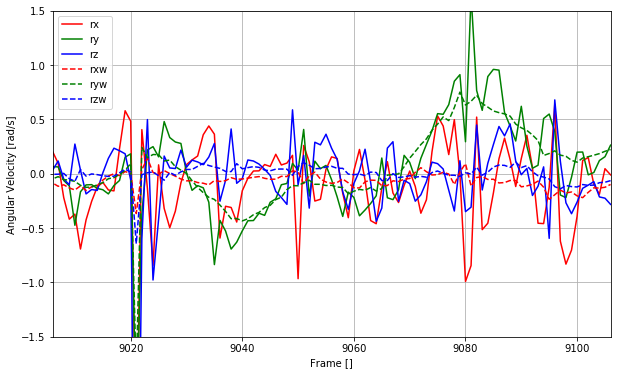

In [7]:
# オリジナルの角速度、最初から最後
plotDualAngularVelocityCSV(t,rxc,ryc,rzc,rxwc,rywc,rzwc,xlim=[0,100],ylim=[-1.5,1.5])
plotDualAngularVelocityCSV(t,rxc,ryc,rzc,rxwc,rywc,rzwc,xlim=[max(t)/2-100,max(t)/2],ylim=[-1.5,1.5])
plotDualAngularVelocityCSV(t,rxc,ryc,rzc,rxwc,rywc,rzwc,xlim=[max(t)-100,max(t)],ylim=[-1.5,1.5])

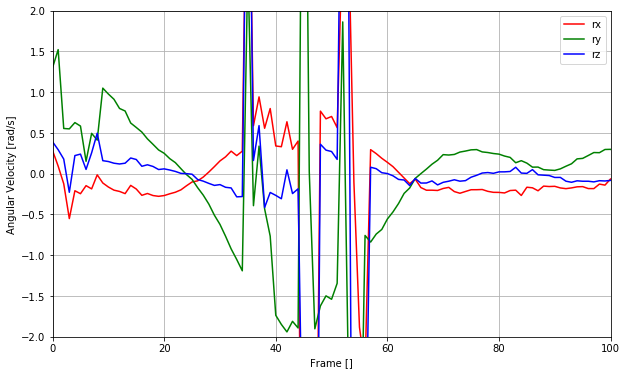

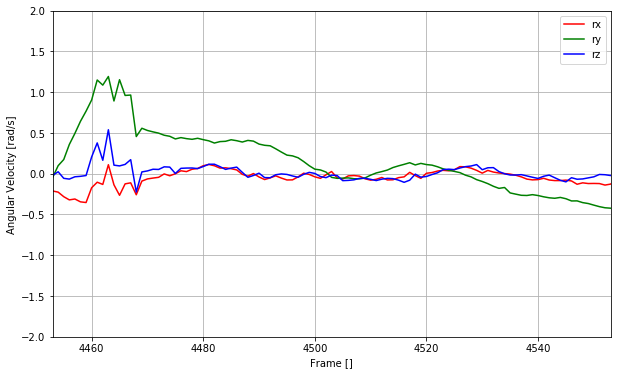

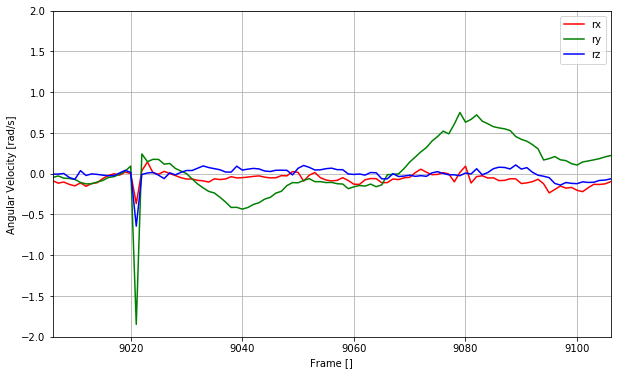

In [8]:
# 手ぶれ補正された角速度、最初から最後
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[0,100],ylim=[-2,2])
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[max(t)/2-100,max(t)/2],ylim=[-2,2])
plotAngularVelocityCSV(tc,rxwc,rywc,rzwc,xlim=[max(t)-100,max(t)],ylim=[-2,2])

In [9]:
# 角加速度を計算する関数を定義。戻り値の配列の長さが元の配列より１短い事に注意。
import numpy as np

def getAngularAcceleration(angular_velocity, sampling_rate):
    return (np.array(angular_velocity)[1:]-np.array(angular_velocity)[:-1])*sampling_rate

In [10]:
aa = getAngularAcceleration(rxc,30)

In [35]:
def plotAngularAcceleration(angular_acceleration,xlim=None,ylim=None):
    plt.figure(figsize=(10,6))
    plt.plot(angular_acceleration)

    plt.ylim(ymin=-100,ymax=100)
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    plt.grid()
    plt.show()

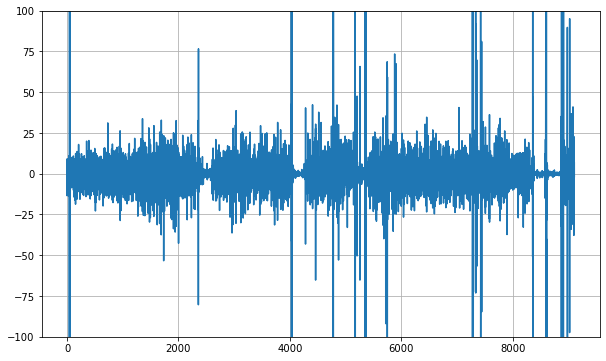

In [12]:
plotAngularAcceleration(aa)

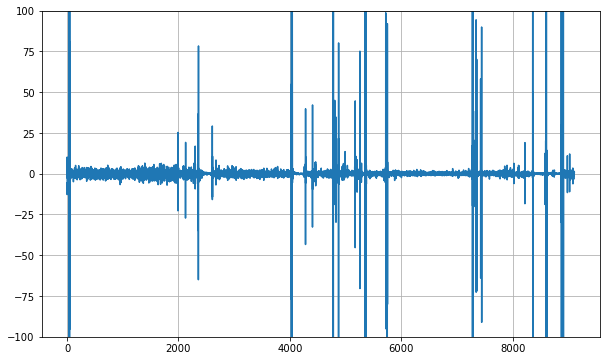

In [13]:
plotAngularAcceleration(getAngularAcceleration(rxwc,30))

In [14]:
np.array(rxc)[1:]

array([ 9.21360e-02, -3.18000e-04, -4.51243e-01, ..., -1.88432e-01,
        4.62510e-02, -1.05240e-02])

In [15]:
np.array(rxc)[:-1]

array([ 0.240916,  0.092136, -0.000318, ..., -0.098035, -0.188432,
        0.046251])

In [16]:
def getAngularAccelerationReductionRatio(original_angular_velocity, stabilized_angular_velocity):
    return abs(getAngularAcceleration(stabilized_angular_velocity,30.)+0.00001) / (abs(getAngularAcceleration(original_angular_velocity,30.))+0.00001)

In [17]:
aad = getAngularAccelerationReductionRatio(rxc,rxwc)

In [18]:
def plotAngularVelocityReductionRatio(ratio,xlim=None):
    plt.figure(figsize=(10,6))
    plt.plot(20.*np.log10(ratio))

    # plt.ylim(ymin=0,ymax=10)
    if xlim is not None:
        plt.xlim(xlim[0],xlim[1])
    plt.grid()
    plt.show()

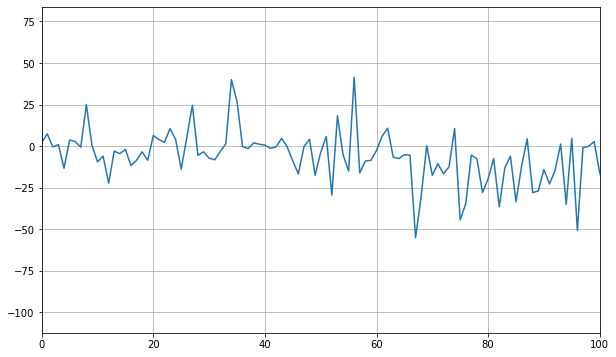

In [19]:
plotAngularVelocityReductionRatio(aad,xlim=[0,100])

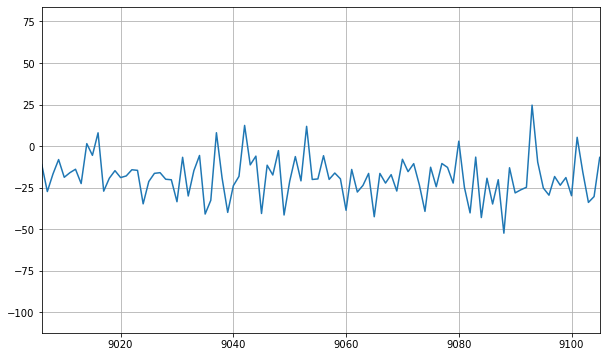

In [20]:
plotAngularVelocityReductionRatio(aad,xlim=[aad.size-100,aad.size-1])

In [21]:
aad.size

9106

In [22]:
def getAverageOfAbsAngularAcceleration(angular_velocity, sampling_rate):
    return np.average(np.abs(getAngularAcceleration(angular_velocity,sampling_rate)))

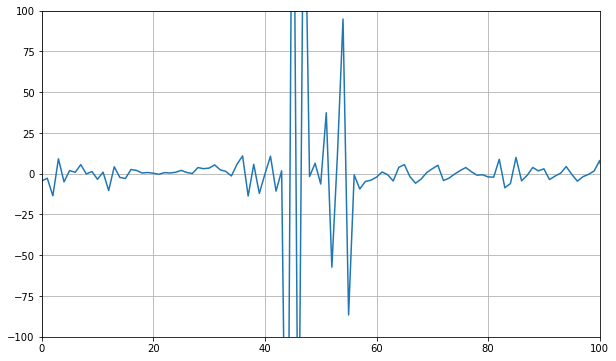

Average:  7.997601078409839


In [26]:
plotAngularAcceleration(getAngularAcceleration(rxc,30),xlim=[0,100])
print('Average: ',getAverageOfAbsAngularAcceleration(rxc,30.))

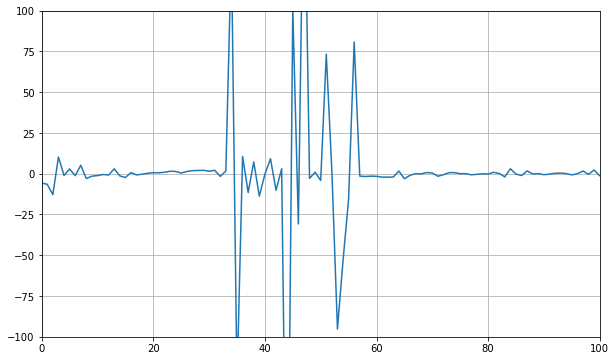

Average:  3.0430526652756424


In [27]:
plotAngularAcceleration(getAngularAcceleration(rxwc,30),xlim=[0,100])
print('Average: ',getAverageOfAbsAngularAcceleration(rxwc,30.))

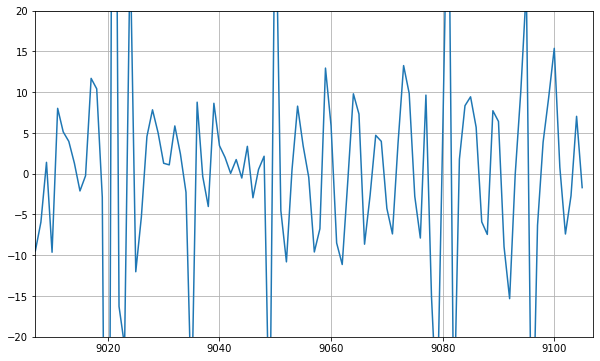

Average:  10.303344242424242


In [46]:
plotAngularAcceleration(getAngularAcceleration(rxc,30),xlim=[len(rxc)-100,len(rxc)],ylim=[-20,20])
print('Average: ',getAverageOfAbsAngularAcceleration(rxc[-101:-1],30.))

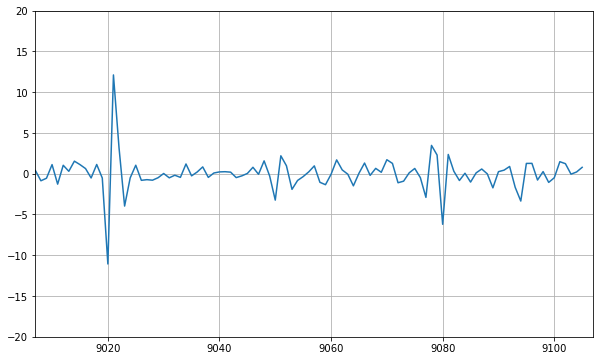

Average:  1.1830069696969698


In [47]:
plotAngularAcceleration(getAngularAcceleration(rxwc,30),xlim=[len(rxwc)-100,len(rxwc)],ylim=[-20,20])
print('Average: ',getAverageOfAbsAngularAcceleration(rxwc[-101:-1],30.))